# Automatic Essay Scoring (AES)

Automatic Essay Scoring (AES) é uma tarefa de machine learning que consistem em atribuir uma nota para redação de maneira automática.
No geral, diversas abordagens na literatura apresentaram resultados significativos na tentativa de realizar esse processo utilizando diversas técnicas e algoritmos focando em diferentes aspectos como analise da corretude gramatical, existência de estrutura retórica entre outras.

Essencialmente, AES consiste em duas principais abordagens, a primeira usa regressão para atribuir uma nota ao texto de entrada, enquanto a segunda tenta classificar a nota em um intervalo predeterminado e fixo, por exemplo, (e.g 0, 50, 100, 150, 200) . Além disso,  podemos ainda dividir as notas por rubricas, aspectos especificos do texto que são avaliados como, por exemplo, apenas a gramatica, ou apenas a argumentação do texto etc.

Nesse contexto, a correção automática de redações do ENEM, por exemplo, tem sido tema de diversos artigos da área que empregam uma diversidade de técnicas com esse fim. Um dos objetivos para isso é a redução do tempo de correção e do custo operacional para isso. Assim, várias artigos, diversas técnicas foram empregadas, tanto aquelas que buscam uma classificação holistica (classificação da nota final) como aquelas que buscam uma classificação por rúbrica (classificação de um aspecto especifico).


Dessa maneira, nesse trabalho, para fins de simplicidade, iremos aplicar técnicas de classificação da nota final de redações do enem. Utilizaremos para isso o conjunto de dados de redações do UOL que contém 4570 redações em diferentes assuntos. Para atribuir uma nota, iremos utilizar um conjunto de classificadores extraindo diversas características relacionadas as aspectos como legibilidade, coesão, coerência e outros para assim classificar a nota entre 0, 50, 100, 150 e 200.



## Carregando o Conjunto de Dados


Nessa etapa, carregamos o conjunto de dados utilizando a biblioteca aibox-nlp que conta com diversos conjuntos de dados relacionados redação do ENEM, bem como, pipelines para extração de caracteríticas (features em inglês).

In [1]:
from aibox.nlp.data.datasets import DatasetEssayBR, DatasetPortugueseNarrativeEssays

N_SAMPLE = 500
# === Essay-BR ===
ds = DatasetEssayBR(extended=False,
                    target_competence='score')
df_dataset = ds.to_frame().sample(n=N_SAMPLE)
df_dataset

/opt/conda/envs/aibox-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,text,target,C1,C2,C3,C4,C5,score,prompt
889,"Na obra"" História da Loucura"" de Michel Foucau...",520,120,120,80,120,80,520,Esse é o cenário enfrentado por Estados das re...
2626,Na Grécia Antiga foi cunhado conceito de cidad...,840,160,160,160,200,160,840,"A testosterona ""constrói a musculatura"", disse..."
1425,A internet sem dúvida é um dos maiores viés de...,680,120,160,120,120,160,680,A cultura do cancelamento é um fenômeno em que...
207,Nosso atual presidente Jair Messias Bolsonaro ...,280,80,40,40,40,80,280,"No dia 15 do mês de janeiro passado, o preside..."
4453,O preconceito racial no Brasil deve ser combat...,680,160,120,120,120,160,680,"""Ascendendo à condição de trabalhador livre, a..."
...,...,...,...,...,...,...,...,...,...
1604,É complicado falar em segurança no meio de tan...,720,120,160,120,160,160,720,"O presidente dos Estados Unidos, Barack Obama,..."
2536,O surgimento de um novo vírus chamado de Covid...,560,120,160,80,120,80,560,Uma pandemia (do grego παν [pan = tudo/ todo(s...
2700,Apesar de estar prevista como uma das ferramen...,800,160,160,120,200,160,800,Educação a distância é a modalidade educaciona...
1727,"Muito se tem discutido recentemente, acerca da...",560,120,120,80,120,120,560,A fome é a situação na qual a alimentação que ...


<Axes: xlabel='target'>

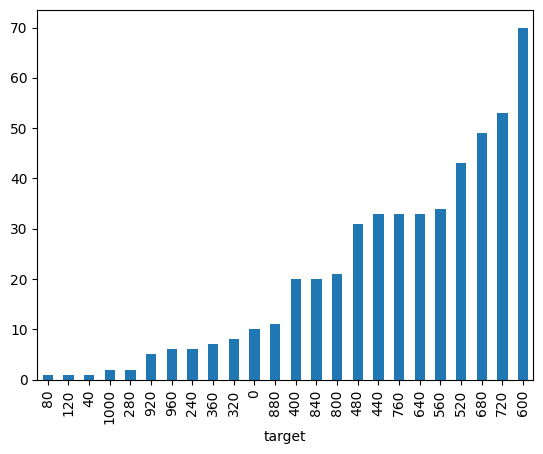

In [2]:
df_dataset.target.value_counts().sort_values().plot(kind="bar")

In [3]:
import numpy as np

count_values = df_dataset.target.value_counts()
low_counts =  count_values >= 6

filtered_df = df_dataset[np.isin(df_dataset.score, count_values[low_counts].index)]
filtered_df

,text,target,C1,C2,C3,C4,C5,score,prompt
889,"Na obra"" História da Loucura"" de Michel Foucau...",520,120,120,80,120,80,520,Esse é o cenário enfrentado por Estados das re...
2626,Na Grécia Antiga foi cunhado conceito de cidad...,840,160,160,160,200,160,840,"A testosterona ""constrói a musculatura"", disse..."
1425,A internet sem dúvida é um dos maiores viés de...,680,120,160,120,120,160,680,A cultura do cancelamento é um fenômeno em que...
4453,O preconceito racial no Brasil deve ser combat...,680,160,120,120,120,160,680,"""Ascendendo à condição de trabalhador livre, a..."
2819,"Atualmente, é possível afirmar que a prática d...",720,120,120,160,120,200,720,"""O homem moderno vem deixando de lado as práti..."
...,...,...,...,...,...,...,...,...,...
1604,É complicado falar em segurança no meio de tan...,720,120,160,120,160,160,720,"O presidente dos Estados Unidos, Barack Obama,..."
2536,O surgimento de um novo vírus chamado de Covid...,560,120,160,80,120,80,560,Uma pandemia (do grego παν [pan = tudo/ todo(s...
2700,Apesar de estar prevista como uma das ferramen...,800,160,160,120,200,160,800,Educação a distância é a modalidade educaciona...
1727,"Muito se tem discutido recentemente, acerca da...",560,120,120,80,120,120,560,A fome é a situação na qual a alimentação que ...


In [109]:
Y = filtered_df.loc[:, 'score'] / 1000

889     0.52
2626    0.84
1425    0.68
4453    0.68
2819    0.72
        ... 
1604    0.72
2536    0.56
2700    0.80
1727    0.56
2159    0.48
Name: score, Length: 488, dtype: float64

## Treinando o Modelo

### Extração de Características


Como abordado em diversos artigos, uma forma de realizar a classificação de redação é usando extração de características do texto.

In [4]:
import json

from aibox.nlp.factory import get_extractor

In [5]:
FEATURES_lIST = ['readabilityBR',
                  'regencyBR',
                  'syntacticComplexityBR',
                  'textualSimplicityBR']

TEXT_EXEMPLE = "O poeta modernista Oswald de Andrade relata, em \"Erro de Português\", que, sob um dia de chuva, o índio foi vestido pelo português - uma denúncia à aculturação sofrida pelos povos indígenas com a chegada dos europeus ao território brasileiro. Paralelamente, no Brasil atual, há a manutenção de práticas prejudiciais não só aos silvícolas, mas também aos demais povos e comunidades tradicionais, como os pescadores. Com efeito, atuam como desafios para a valorização desses grupos a educação deficiente acerca do tema e a ausência do desenvolvimento sustentável."

In [6]:
# === Obtendo um único extrator ===
readability_extractor = get_extractor(FEATURES_lIST)
extraction = readability_extractor.extract(TEXT_EXEMPLE)
features_dict = extraction.as_dict()
print( json.dumps(features_dict, indent=2, ensure_ascii=False))


nlpbox: download dictionary/biderman-words.v1: 100%|██████████| 22.4k/22.4k [00:00<00:00, 132kB/s]
nlpbox: download dictionary/morph-checker.v1: 100%|██████████| 1.32k/1.32k [00:00<00:00, 517kB/s]
nlpbox: download dictionary/nominal-regency.v1: 100%|██████████| 1.46k/1.46k [00:00<00:00, 493kB/s]
nlpbox: download dictionary/biderman-concrete-words.v1: 100%|██████████| 26.2k/26.2k [00:00<00:00, 112kB/s]

{
  "adapted_dalechall": 5.09875968992248,
  "adverbs_before_main_verb_ratio": 0.16666666666666666,
  "brunet_indice": 9.066469756208491,
  "clauses_per_sentence": 2.0,
  "coord_conj_ratio": 1.0,
  "coordinate_conjunctions_per_clauses": 0.5,
  "dialog_pron_ratio": 0,
  "easy_conj_ratio": 0.12790697674418605,
  "flesch_indice": 30.863914728682204,
  "gunning_fox_indice": 11.606201550387597,
  "hard_conj_ratio": 0.023255813953488372,
  "honore_statistics": 1373.4939003829327,
  "infinite_subordinate_clauses": 0.3333333333333333,
  "long_sentence_ratio": 1.0,
  "medium_long_sentence_ratio": 0.0,
  "medium_short_sentence_ratio": 0.0,
  "nominal_regency_score": 1.0,
  "passive_ratio": 0.3333333333333333,
  "readibility_indice": 18.04158914728682,
  "sentences_with_1_clauses": 2,
  "sentences_with_2_clauses": 0,
  "sentences_with_3_clauses": 0,
  "sentences_with_4_clauses": 1,
  "sentences_with_5_clauses": 0,
  "sentences_with_6_clauses": 0,
  "sentences_with_7_clauses": 0,
  "short_sentence

In [7]:
import numpy as np
extraction = [features.as_numpy().tolist()
                        for features in map(readability_extractor.extract, filtered_df["text"])]

X = np.array(extraction)


X[:5]

array([[5.66279459e+00, 5.38461566e-01, 1.11082420e+01, 3.71428561e+00,
        6.92307711e-01, 3.46153855e-01, 0.00000000e+00, 2.03571424e-01,
        2.90642853e+01, 1.61285706e+01, 1.78571437e-02, 1.00799603e+03,
        4.73684222e-01, 7.14285731e-01, 1.42857149e-01, 0.00000000e+00,
        7.50000000e-01, 7.69230798e-02, 2.22545719e+01, 3.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.00000000e+00, 1.42857149e-01, 0.00000000e+00,
        1.51224434e+00, 3.07692319e-01, 6.87207108e+01, 1.00000000e+00,
        8.00000000e+00],
       [4.63172817e+00, 2.05882356e-01, 1.12260647e+01, 2.26666665e+00,
        3.00000012e-01, 1.76470593e-01, 0.00000000e+00, 3.17073166e-01,
        4.93080482e+01, 7.78852510e+00, 1.04529615e-02, 1.03710632e+03,
        3.26086968e-01, 8.00000012e-01, 0.00000000e+00, 6.66666701e-02,
        1.00000000e+00, 1.76470593e-01, 1.23102903e+01, 7.00000000e+00,
        3.00000000e+00, 3.00000000e+00,

## Normalizando os dados

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

Y_transformed = filtered_df.target.to_numpy()

X_transformed.shape, Y.shape

((488, 33), (488,))

In [122]:
Y_transformed

array([0.52, 0.84, 0.68, 0.68, 0.72, 0.6 , 0.24, 0.48, 0.6 , 0.56, 0.48,
       0.84, 0.56, 0.68, 0.6 , 0.76, 0.52, 0.6 , 0.6 , 0.64, 0.52, 0.48,
       0.6 , 0.88, 0.6 , 0.48, 0.72, 0.24, 0.48, 0.68, 0.52, 0.6 , 0.44,
       0.68, 0.76, 0.44, 0.52, 0.32, 0.4 , 0.6 , 0.52, 0.68, 0.48, 0.6 ,
       0.76, 0.52, 0.56, 0.8 , 0.52, 0.6 , 0.4 , 0.6 , 0.6 , 0.8 , 0.72,
       0.68, 0.68, 0.56, 0.4 , 0.52, 0.52, 0.76, 0.36, 0.68, 0.72, 0.6 ,
       0.56, 0.6 , 0.44, 0.56, 0.76, 0.76, 0.68, 0.48, 0.32, 0.56, 0.6 ,
       0.72, 0.52, 0.52, 0.8 , 0.76, 0.52, 0.72, 0.6 , 0.88, 0.64, 0.52,
       0.72, 0.64, 0.8 , 0.6 , 0.56, 0.68, 0.68, 0.72, 0.52, 0.76, 0.88,
       0.6 , 0.52, 0.6 , 0.52, 0.56, 0.72, 0.8 , 0.64, 0.56, 0.48, 0.72,
       0.44, 0.44, 0.6 , 0.6 , 0.6 , 0.76, 0.64, 0.88, 0.4 , 0.96, 0.44,
       0.6 , 0.44, 0.64, 0.44, 0.6 , 0.48, 0.48, 0.52, 0.8 , 0.68, 0.52,
       0.76, 0.6 , 0.76, 0.68, 0.84, 0.6 , 0.88, 0.52, 0.88, 0.52, 0.44,
       0.64, 0.68, 0.48, 0.44, 0.68, 0.6 , 0.44, 0.

### Dividindo o Conjunto de Dados Train and Test






In [161]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Separando os dados em treinamento(75%) e teste(25%)
sm = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = sm.fit_resample(X_transformed, Y_transformed) # Usando oversampling de classes minoritárias
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size = 0.25)

In [166]:
Y_test

array([720, 520, 840, 240, 640, 680,   0, 880, 800, 680, 720, 880, 760,
       440,   0, 680, 480, 480, 640, 800, 440, 720, 320, 640, 320, 880,
       400, 760, 240, 880, 560, 720, 360, 440, 320, 360, 840, 840, 440,
       560, 480, 440, 240,   0, 840, 560, 560, 760, 520,   0, 600, 800,
       440, 320, 480, 840, 960, 960,   0, 840, 360, 240, 520, 760, 320,
       320, 440, 520, 520, 480, 640, 880, 480, 400, 320, 640, 640,   0,
       240, 400, 800, 480, 880, 680, 440, 520, 840, 680, 640, 760, 560,
       360, 440, 760, 360, 880, 640, 720, 480, 560, 680, 240, 440, 400,
       440, 960, 360, 880, 960, 440, 560, 400, 680, 560, 680, 840, 240,
       720, 960, 560, 360, 960, 720, 320, 640, 600, 760, 440, 520, 600,
       760, 720, 960, 760, 960, 240, 960, 360, 640, 320, 360, 760, 400,
       240, 960, 880, 760, 520, 320, 600, 720, 960, 480, 960, 560, 840,
       560, 560, 560, 480, 720, 400, 400, 520, 400, 720, 680, 440, 720,
       320, 800, 600, 960, 840, 720, 800, 640, 760, 640, 480, 60

### Treinando com Modelos


Podemos treinar com o modelo caixa branca, neste caso, árvore de decisão. Objetivo é garantir a existência de um modelo baseline.
Além disso, completamos nossa análise com os modelos que são caixa preta e que precisão de uma análise de explicabilidade.

In [167]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR

svc_clf = SVC(kernel="linear", C=0.025).fit(X_train, Y_train)
rf_clf = RandomForestClassifier(max_depth=12, random_state=0).fit(X_train, Y_train)
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)


In [170]:
clf_list = [svc_clf,rf_clf,gb_clf,knn_clf ]

In [171]:
from sklearn import metrics

report = {}
for clf in clf_list:
    score = metrics.cohen_kappa_score(Y_test, clf.predict(X_test), weights="quadratic")
    report[clf.__class__.__name__] = score

### Analise dos Resultados

Por meio dos resultados podemos ver que os modelos tem resultados comparativos ruins entre si.

In [172]:
import pandas as pd


pd.DataFrame.from_dict(report, orient='index', columns=["kappa"])

,mse
SVC,0.747322
RandomForestClassifier,0.929924
GradientBoostingClassifier,0.411649
KNeighborsClassifier,0.800480


## Explicabilidade

### Global Surrogates

Global Surrogates é uma forma de explicabilidade que usa um modelo caixa branca, explicável para entender as saídas de um modelo caixa preta (não explicável).
É uma tentativa de obter uma explicação geral sobre o resultado final do modelo ao invés de explicar apenas uma saída.

No nosso caso, iremos utilizar o modelo Decision tree, caixa branca, para tentar explicar as saídas do modelo caixa preta.

In [144]:
from sklearn.tree import DecisionTreeRegressor

Y_hat = clf.predict(X_test)
dt_clf = DecisionTreeRegressor(max_depth=16).fit(X_test, Y_hat)

In [146]:
Y_hat_dt = dt_clf.predict(X_test)
print("Global Sogarrote accuracy: ", metrics.mean_squared_error(Y_hat, Y_hat_dt ))

Global Sogarrote accuracy:  1.7680668341915607e-33


### Permutation Feature Importance




In [147]:
from sklearn.inspection import permutation_importance
import pandas as pd

def calculate_pfi(model, x_test, y_test, feature_names):

    r = permutation_importance(model, x_test, y_test,
                            n_repeats=30,
                            random_state=0)

    features_df = []
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:

            print(f"{feature_names[i]:<8} "
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
            features_df.append({
                "feature_names": feature_names[i],
                "mean": r.importances_mean[i],
                "std": r.importances_std[i]
            })

    return pd.DataFrame(features_df).set_index("feature_names")

Calculando Feature importance for model:  SVR
flesch_indice 0.247 +/- 0.054
brunet_indice 0.145 +/- 0.028
coord_conj_ratio 0.020 +/- 0.008
subord_conj_ratio 0.020 +/- 0.008
sentences_with_5_clauses 0.016 +/- 0.005
sentences_with_7_clauses 0.014 +/- 0.007
nominal_regency_score 0.014 +/- 0.007
                              mean       std
feature_names                               
flesch_indice             0.247492  0.053922
brunet_indice             0.145255  0.028285
coord_conj_ratio          0.020483  0.007524
subord_conj_ratio         0.020483  0.007524
sentences_with_5_clauses  0.016154  0.004794
sentences_with_7_clauses  0.014490  0.006671
nominal_regency_score     0.014356  0.007049

----------
Calculando Feature importance for model:  RandomForestRegressor
brunet_indice 0.267 +/- 0.042
flesch_indice 0.252 +/- 0.053
sentences_with_2_clauses 0.038 +/- 0.017
                              mean       std
feature_names                               
brunet_indice             0.266647 

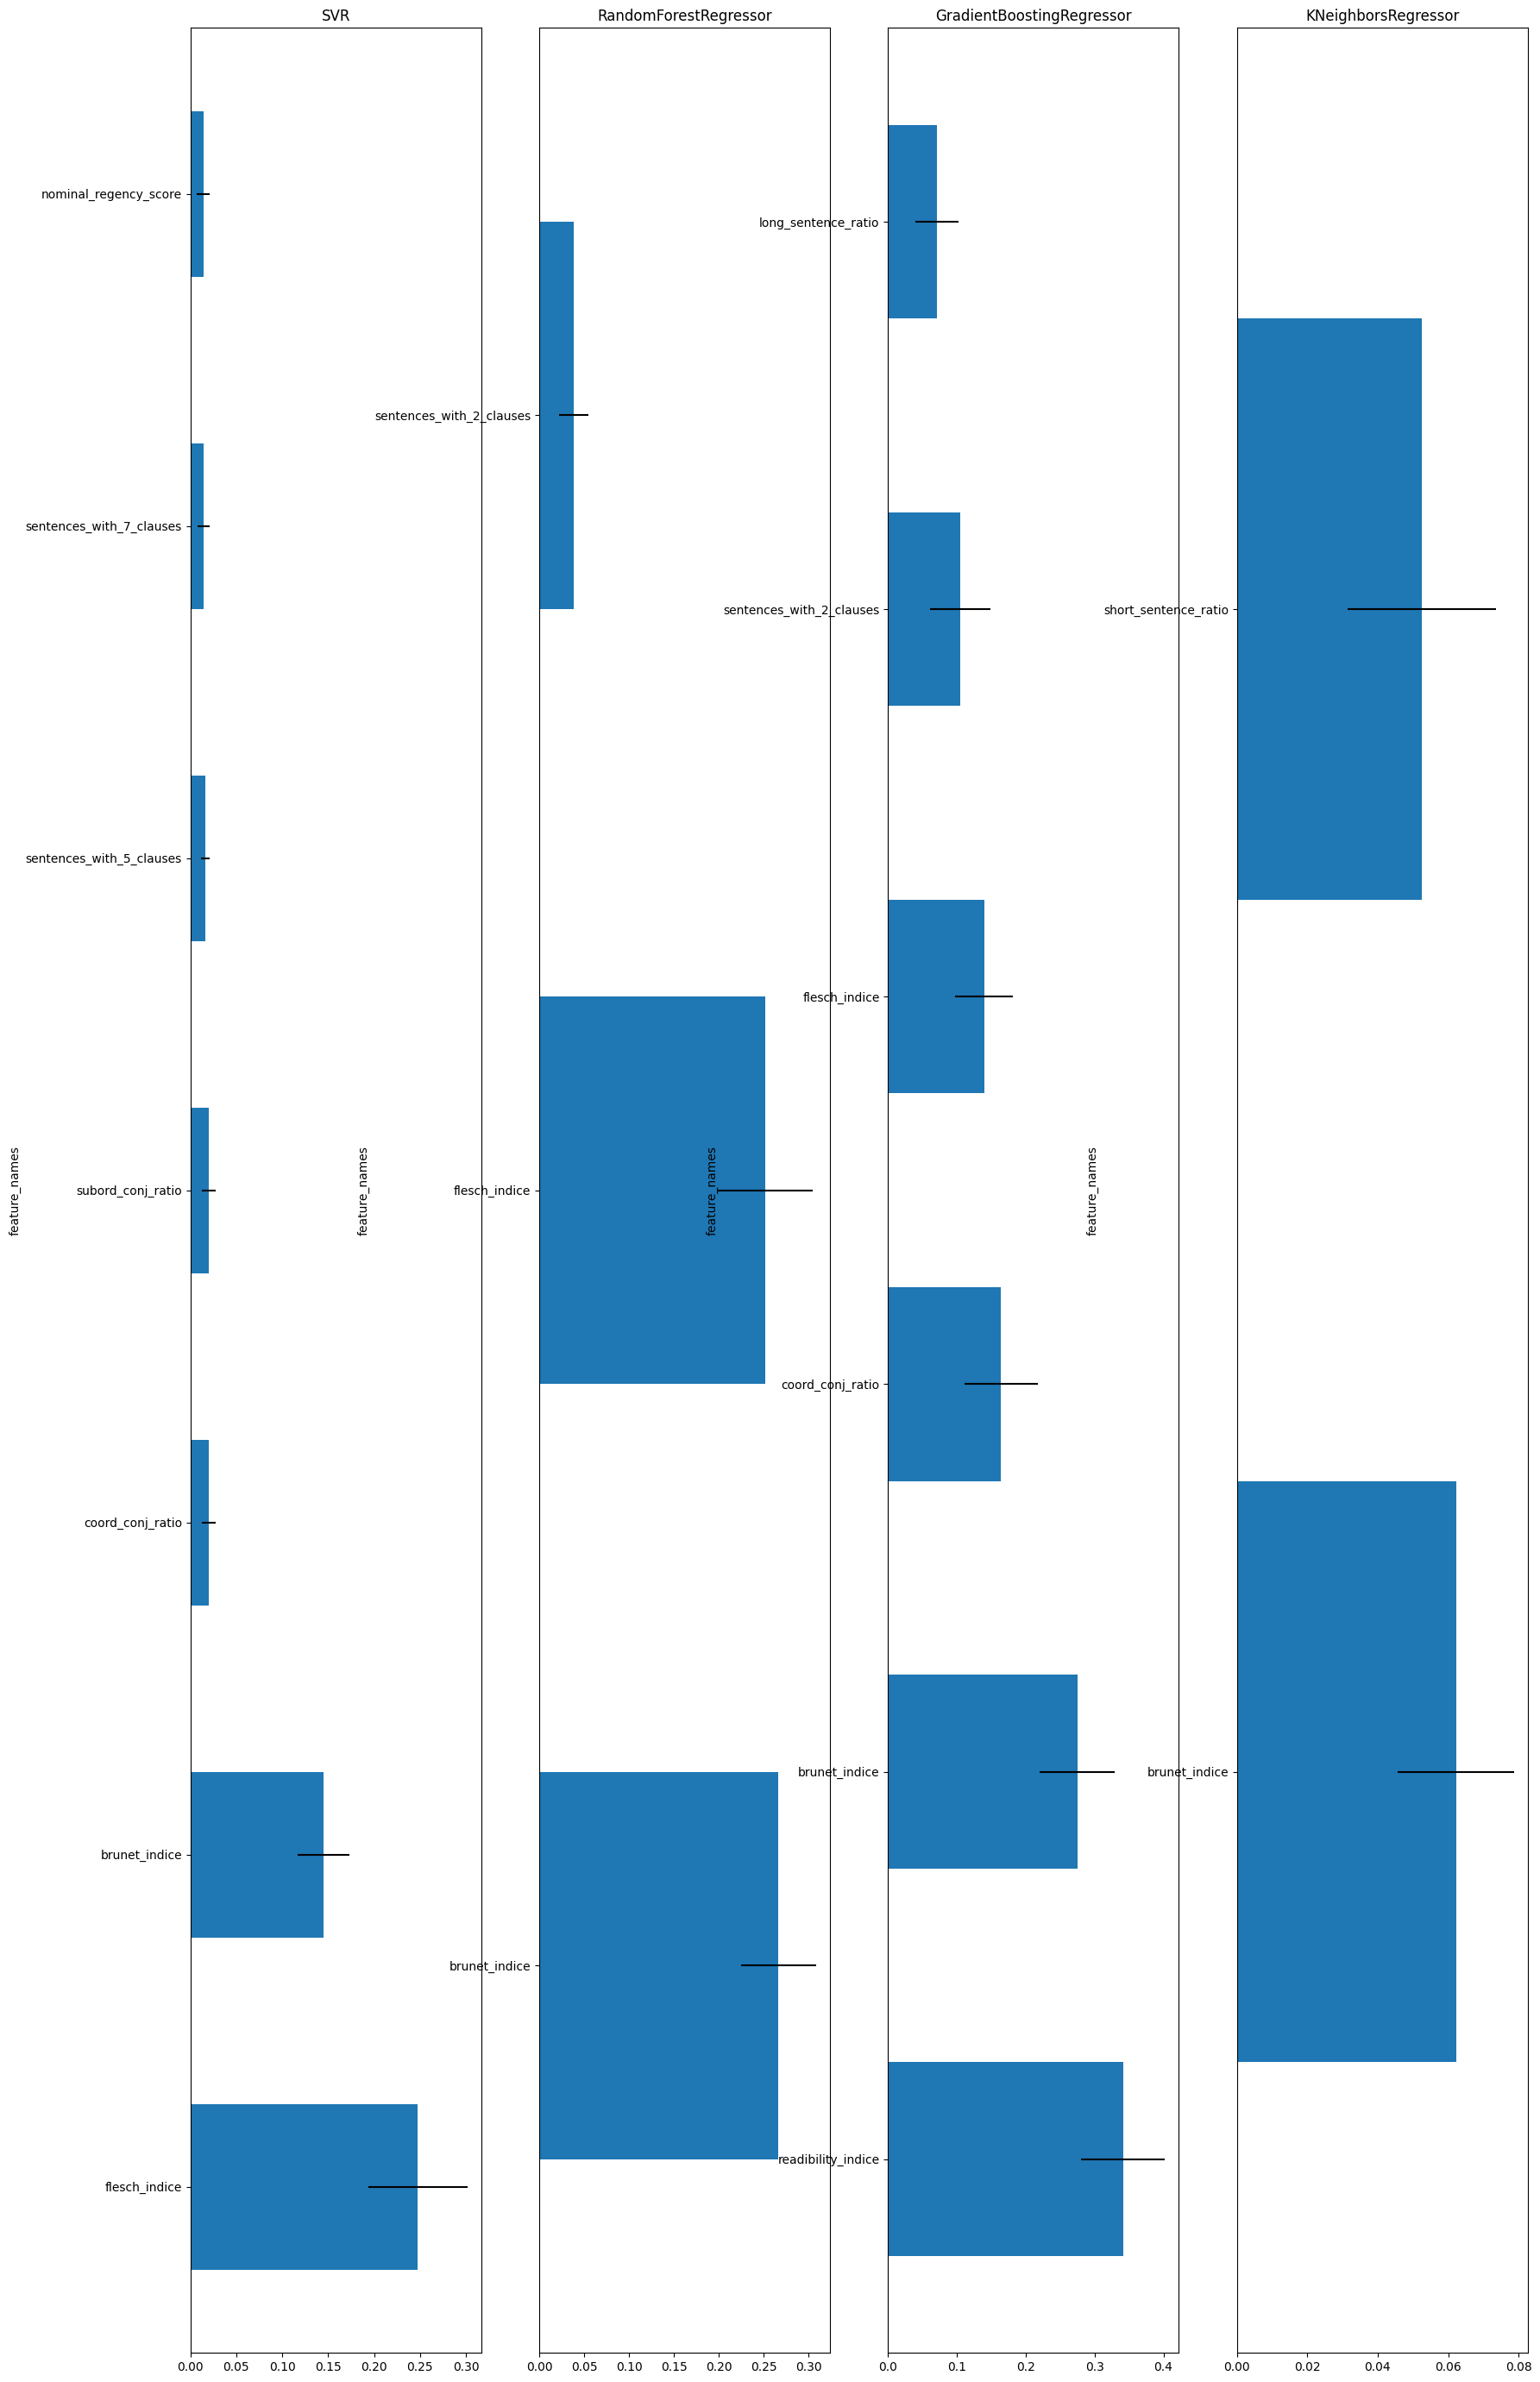

In [148]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(clf_list), figsize=(20,35))
feature_names = list(features_dict.keys())
for i, ml_class in enumerate(clf_list):

    ml_name = ml_class.__class__.__name__
    print("Calculando Feature importance for model: ", ml_name)
    df = calculate_pfi(ml_class, X_test, Y_test, feature_names)
    print(df)
    df.plot(kind = "barh", y = "mean", legend = False,
            title = ml_name, xerr = "std", ax=axes[i] if len(clf_list) > 1 else axes)
    print()
    print("-"*10)

### LIME

In [151]:
import lime
from lime import lime_text
import lime.lime_tabular as lime_tb

feature_names = list(features_dict.keys())
class_names = set(Y_test)
explainer = lime_tb.LimeTabularExplainer(X_train, feature_names =     
                                 feature_names,  class_names=class_names, 
                                 mode = 'regression')

In [156]:
idx = 60
exp = explainer.explain_instance(X_test[idx], rf_clf.predict, num_features=len(FEATURES_lIST))
print('Document id: %d' % idx)
print('Probability =', rf_clf.predict([X_test[idx]]))
print('True class: %s' % Y_test[idx])
exp.as_list()


Document id: 60
Probability = [0.72859313]
True class: 0.56


[('-0.66 < flesch_indice <= 0.03', 0.04175989223166122),
 ('sentences_with_2_clauses > 0.14', 0.030724502938351474),
 ('-0.63 < brunet_indice <= 0.08', 0.012817043233020646),
 ('honore_statistics > 0.62', 0.012394977284261373)]

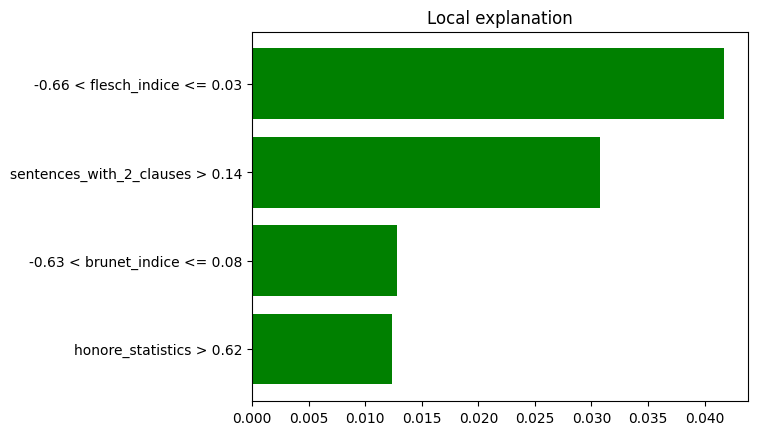

In [157]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [158]:
exp.show_in_notebook(show_table=True)